<h1>1. Introducción</h1>

<p>Según los úlimos estudios llevados a cabo por las grandes empresas del sector, a finales de 2018 se preveía que más de 3.000 millones de personas iban a ser usuarios de un <i>"Smartphone"</i>. De esos 3.000 millones, 2.200 millones utilizan el sistema operativo <b>Android</b>. Este SO admite el uso de aplicaciones llamadas <i>Apps</i> para dar al usuario una gran cantidad de versatilidad a la hora de utilizar su dispositivo.</p>

<p>Por ello se ha escogido el dataset llamado <b>Google Play Store Apps</b>, que consta de 13 variables que definen diferentes cuestiones de la aplicación.<p>

<h1>2. Variables</h1>

Las variables que se utilizarán en el estudio de las aplicaciones son las siguientes:

* App (String): Nombre de la aplicación.
* Category (String): Categoría de la aplicación.
* Rating (Decimal): Valoración global de la aplicación.
* Reviews (Integer): Número de reviews.
* Size (String): Tamaño de la aplicación.
* Installs (String): Número de veces que se ha instalado la aplicación.
* Type (String): Gratuita o de pago.
* Price (String): Precio de la aplicación en caso de que sea de pago.
* Content Rating (String): Público objetivo en base a la edad.
* Genres (String): Género de la aplicación, por ejemplo, Musical Family Game, puede tener los géneros 'música', 'juego', 'familiar'.
* Last Updated (Date): Fecha de la última actualización de la aplicación.
* Current Ver (String): Versión actual de la aplicación.
* Android Ver (String): Mínima versión requerida de Android para que funcione la aplicación.

<h1>3. Preparación del set de datos</h1>

<p>Antes de empezar a analizar los datos, es importante recogerlos de la misma forma que en el dataset original. Este apartado se dedicará exclusivamente a la preparación y limpieza de los datos del dataset.</p>

In [2]:
#Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
#Carga del dataframe

df = pd.read_csv('datasets/googleplaystore.csv',
                 na_values = ['NaN'],
                 dtype = {'App':str, 
                          'Category':str, 
                          'Rating':'float16',
                          'Reviews':object,
                          'Size':str,
                          'Installs':str,
                          'Type':str,
                          'Price':str,
                          'Content Rating':str,
                          'Genres':str,
                          'Last Updated':object,
                          'Current Ver':str,
                          'Android Ver':str                      
                         })

#Para evitar problemas con los espacios en los nombres de las columnas, se renombran sin espacios.

df.columns = ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'ContentRating', 'Genres', 'LastUpdated',
             'CurrentVer', 'AndroidVer']

# Debido a una fila corrupta, hay que cargar las columnas con el tipo 'object' ya que al intentar cargar las columnas en su 
# tipo original, da problemas de conversión.

print(df.dtypes)

#Limpieza del dataframe

# Por lo tanto, una vez localizada la fila corrupta, se elimina accediendo a través de su índice
# filtrando la línea a través de uno de los datos corruptos (categoría = 1.9).

df = df.drop(df[df.Category == '1.9'].index)

#Una vez eliminada la fila conflictiva, se toma la columna Reviews como integer.

df['Reviews'] = df['Reviews'].astype('int16')

df['LastUpdated'] = df['LastUpdated'].astype('datetime64')

print(df.dtypes)



App               object
Category          object
Rating           float16
Reviews           object
Size              object
Installs          object
Type              object
Price             object
ContentRating     object
Genres            object
LastUpdated       object
CurrentVer        object
AndroidVer        object
dtype: object
App                      object
Category                 object
Rating                  float16
Reviews                   int16
Size                     object
Installs                 object
Type                     object
Price                    object
ContentRating            object
Genres                   object
LastUpdated      datetime64[ns]
CurrentVer               object
AndroidVer               object
dtype: object


<h1>4. Datos de interés sobre el dataset</h1>

<p>Durante esta sección del notebook, se mostrarán de forma gráfica los datos de interés del dataset. Antes del código y la muestra de las gráficas, se explicará en qué consiste el análisis y por qué puede tener interés</p>

<h2>4.1 

               Category  Count
11               FAMILY   1972
14                 GAME   1144
29                TOOLS    843
20              MEDICAL    463
4              BUSINESS    460
25         PRODUCTIVITY    424
23      PERSONALIZATION    392
6         COMMUNICATION    387
28               SPORTS    384
18            LIFESTYLE    382
12              FINANCE    366
15   HEALTH_AND_FITNESS    341
24          PHOTOGRAPHY    335
27               SOCIAL    295
21   NEWS_AND_MAGAZINES    283
26             SHOPPING    260
30     TRAVEL_AND_LOCAL    258
7                DATING    234
3   BOOKS_AND_REFERENCE    231
31        VIDEO_PLAYERS    175
8             EDUCATION    156
9         ENTERTAINMENT    149
19  MAPS_AND_NAVIGATION    137
13       FOOD_AND_DRINK    127
16       HOUSE_AND_HOME     88
17   LIBRARIES_AND_DEMO     85
1     AUTO_AND_VEHICLES     85
32              WEATHER     82
0        ART_AND_DESIGN     65
10               EVENTS     64
22            PARENTING     60
5       

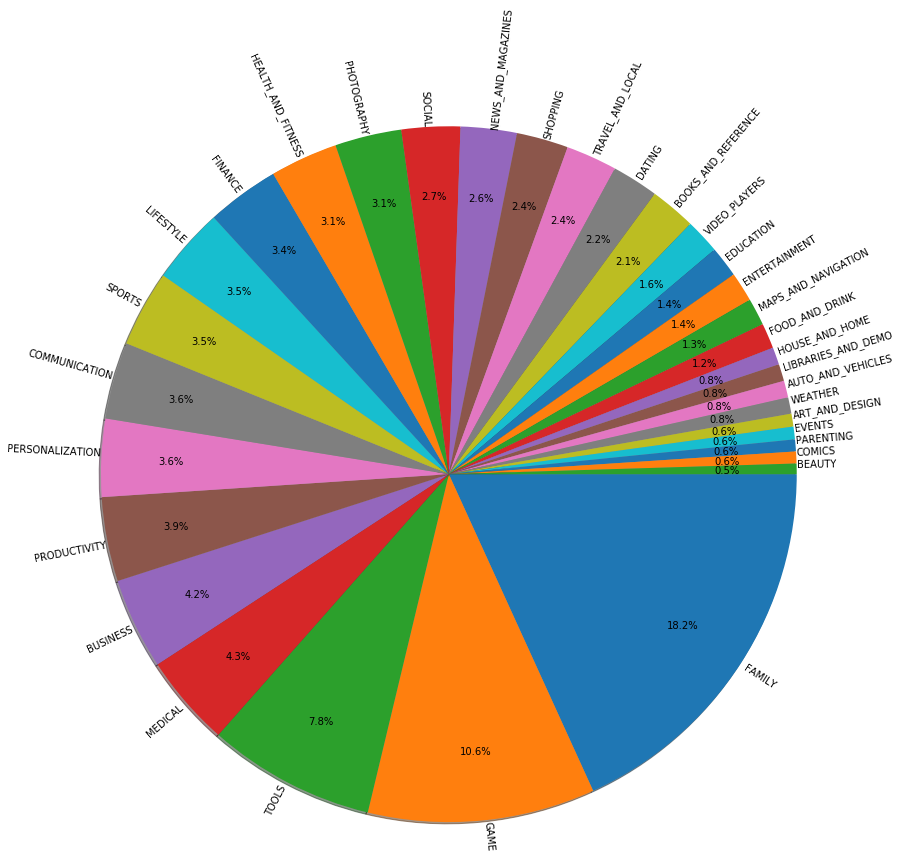

In [77]:
#Gráfica de tarta con los géneros de las aplicaciones.

dfCategory = df.groupby('Category').size().reset_index(name='Count').sort_values(by=['Count'], ascending = False)

dfCategory

print(dfCategory)

categories = dfCategory['Category']
count = dfCategory['Count']

plt.pie(count, labels=categories, shadow=True, startangle=0, radius=4, autopct='%1.1f%%', 
        pctdistance=0.8, labeldistance=1, rotatelabels=True, counterclock = False)

plt.show()
